## Learn Word2Vec by implementing it in TF

Best way to understand an algorithm is to implement it.

[Best way to understand an algorithm is to implement it](https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac)

In [20]:
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_eager_execution()

In [21]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.':
        words.append(word)
print(words)
words = set(words)
print(words)

['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen']
{'queen', 'royal', 'he', 'the', 'she', 'is', 'king'}


In [22]:
words = ['queen', 'king', 'is', 'he', 'she', 'royal', 'the']
words

['queen', 'king', 'is', 'he', 'she', 'royal', 'the']

In [23]:
word2int = {}
int2word = {}
vocab_size = len(words)

for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print(word2int)
print()
print(int2word)

{'queen': 0, 'king': 1, 'is': 2, 'he': 3, 'she': 4, 'royal': 5, 'the': 6}

{0: 'queen', 1: 'king', 2: 'is', 3: 'he', 4: 'she', 5: 'royal', 6: 'the'}


In [24]:
sentences = []
for sentence in corpus_raw.split('.'):
    sentences.append(sentence.split())
    
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

#### 现在我们需要生成训练数据了

In [25]:
data = []

WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        low_bound = max(word_index - WINDOW_SIZE, 0)
        up_bound = min(word_index + WINDOW_SIZE, len(sentence)) + 1
        for nb_word in sentence[low_bound:up_bound]:
            if nb_word != word:
                data.append([word, nb_word])
data
        

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

#### 训练数据

对于训练数据，我们需要划分出 X 和 Y, 并且对它们其做 one_hot。从上面的盒子，第一列是 X, input_word; 第二列是 Y, output_word;

In [26]:
def to_one_hot(data_point_index, vocab_size):
    one_hot_code = np.zeros(vocab_size)
    one_hot_code[data_point_index] = 1
    return one_hot_code

x_train = [] # input word
y_train = [] # output word

for word_pair in data:
    x_train.append(to_one_hot(word2int[ word_pair[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ word_pair[1] ], vocab_size))

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train)
print()
print(y_train)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 

In [27]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


###  TensorFlow 模型

有了 X, Y，我们就可以构建我们的 TF 模型了。


In [28]:
EMBEDDING_DIM = 5

def model():
    x = tf.placeholder(tf.float32, shape=(None, vocab_size))
    y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))
    W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
    b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
    
    hidden_representation = tf.add(tf.matmul(x, W1), b1)
    
    W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
    b2 = tf.Variable(tf.random_normal([vocab_size]))
    
    z = tf.add(tf.matmul(hidden_representation, W2), b2)
    
    predict = tf.nn.softmax(z)
    
    cross_entropy_loss = tf.reduce_mean(
        -tf.reduce_sum(y_label * tf.log(predict), reduction_indices=[1]))
    return x, y_label, predict, cross_entropy_loss, W1, b1
                             

In [29]:
n_iters = 10000
with tf.Session() as sess:
    x, y_label, predict, loss, W1, b1 = model()
    
    init = tf.global_variables_initializer()
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    
    feed_dict = {
        x: x_train,
        y_label: y_train
    }
    sess.run(init)
    for i in range(n_iters):
        sess.run(train_step, feed_dict)
        _, loss_val = sess.run([train_step, loss], feed_dict)
#         if (i % 500 == 0):
#             print('Epoch %d loss is %4.3f' % (i, loss_val))
    
    print(sess.run(W1))
    print(sess.run(b1))
    vectors = sess.run(W1 + b1)

[[ 0.6037853   0.6518512  -2.9716039   1.2559943   1.0694216 ]
 [ 0.04293491 -0.595455   -2.0238845  -0.6429834  -2.4206436 ]
 [-1.2269549   2.5857193   0.38521102  0.15727368  0.6382453 ]
 [-0.34678775 -1.3753464   0.07432036 -0.337929   -0.01936926]
 [-0.74828684 -1.2002064   0.3237147  -0.35348463 -0.66281503]
 [ 0.02022447 -1.3378646   1.4180533   1.6034536   1.2215294 ]
 [ 2.7362833   1.3575916   1.9014097   1.1230485   0.4995059 ]]
[-0.43320796 -0.67651874 -0.3098079  -0.7158712  -0.16610207]


In [30]:
# 现在我们字典中的 7 个单词就被转换成了 vector 了。
print(vectors)

[[ 0.17057732 -0.02466756 -3.2814116   0.5401231   0.9033196 ]
 [-0.39027303 -1.2719737  -2.3336926  -1.3588545  -2.5867457 ]
 [-1.6601629   1.9092007   0.07540312 -0.55859756  0.47214323]
 [-0.7799957  -2.051865   -0.23548754 -1.0538002  -0.18547133]
 [-1.1814948  -1.8767252   0.01390681 -1.0693558  -0.8289171 ]
 [-0.41298348 -2.0143833   1.1082454   0.8875824   1.0554273 ]
 [ 2.3030753   0.6810729   1.5916018   0.40717733  0.33340383]]


In [31]:
# 看下 'queen' 单词的表示
print(vectors[word2int['queen']])

[ 0.17057732 -0.02466756 -3.2814116   0.5401231   0.9033196 ]


### With Embeddins

其实上面学习到的 Vectors 就是一个 Embeddings 矩阵。

In [33]:
inputs = tf.placeholder(tf.int32, [None], name='word_ids')
embeddings = tf.constant(vectors)
embedded = tf.nn.embedding_lookup(embeddings, inputs)

with tf.Session() as sess:
    transformed = sess.run(embedded, {
        inputs: [word2int['queen'], word2int['royal']]
    })
    print(transformed)

[[ 0.17057732 -0.02466756 -3.2814116   0.5401231   0.9033196 ]
 [-0.41298348 -2.0143833   1.1082454   0.8875824   1.0554273 ]]


### Word2Vec 

Wrod2Vec 转换完成后，我们就可以计算它们的相似度，并把他们给画出来了。

In [228]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def find_closest(word_index, vectors):
    min_dist = np.inf
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        dist = euclidean_dist(query_vector, vector)
        if dist < min_dist and not np.array_equal(vector, query_vector):
            min_dist = dist
            min_index = index
    return min_index

In [210]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

he
king
he


###  绘制图形

首先对数据进行下降维，从 5 维降到 2 维。可以使用 tSNE(teesnee)!

在绘制之前，我们需要先对向量做一下规一化处理，这样才能更好的绘制。

In [229]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [230]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors, 'l2')
print(vectors)

[[ 0.6365995   0.77119464]
 [-0.39817494  0.9173095 ]
 [ 0.9058182  -0.4236667 ]
 [ 0.57071555 -0.8211478 ]
 [-0.9965617  -0.08285362]
 [ 0.99798524 -0.0634459 ]
 [-0.3477955  -0.93757045]]


she 0.6365995 0.77119464
is -0.39817494 0.9173095
king 0.9058182 -0.4236667
queen 0.57071555 -0.8211478
the -0.9965617 -0.082853615
royal 0.99798524 -0.0634459
he -0.3477955 -0.93757045


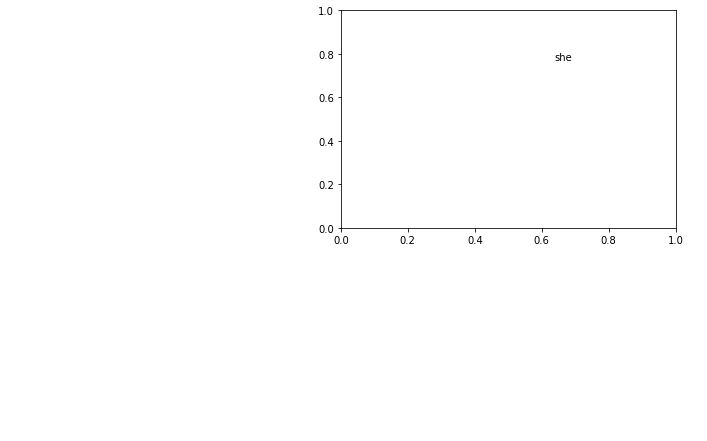

In [231]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word in words:
    vec = vectors[word2int[word]]
    print(word, vec[0], vec[1])
    ax.annotate(word, (vec[0], vec[1]))
plt.show()